## Plot ActivitySim memory usage over the model run

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
def read_mem_log(mem_log_file_path, col_name):

    mem_df = pd.read_csv(mem_log_file_path)

    t = pd.to_datetime(mem_df.time, errors='coerce', format='%Y/%m/%d %H:%M:%S')
    seconds = (t - t.min()).dt.total_seconds()
    minutes = (seconds / 60)

    mem_df['minutes'] = minutes.round(2)
    mem_df['mem_gb'] = (mem_df[col_name].astype(np.int64) / 1_000_000_000)
    
    mem_df = mem_df.sort_values('minutes')

    mem_df = mem_df[['mem_gb', 'minutes']].set_index('minutes')
    
    #print(mem_df)
    
    return mem_df

def plot_mem_usage(mem_log_file_path, col_name, title):
    
    mem_df = read_mem_log(mem_log_file_path, col_name)
    
    with plt.style.context('seaborn'):
        ax = mem_df['mem_gb'].plot()
        ax.set_ylabel(f"{col_name} (GB)")
        ax.set_xlabel(f"runtime (minutes)")
        plt.title(title)

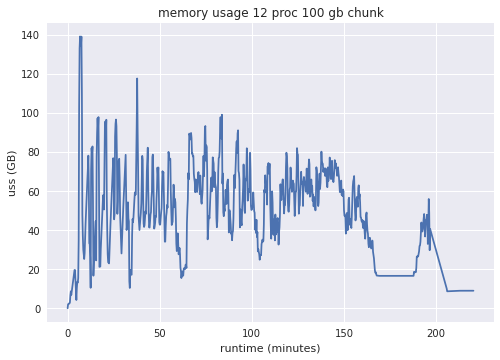

In [25]:
plot_mem_usage("output/omnibus_mem.csv", 'uss', 'memory usage')